# Instituto Nacional de Matemática Pura e Aplicada
## Curso de Algoritmos
### Assignment sobre Fecho Convexo
### Aluno: Hallison da Paz
### Rio de Janeiro, novembro de 2015



Este trabalho tem por objetivo estudar o problema de determinação de fecho convexo de pontos no plano. Para isso, serão implementados, e analisados sob questões de desempenho, os algoritmmos de Graham e de Jarvis. O código completo para este problema encontra-se em [1].

**1. Implemente o algoritmo de Jarvis e o algoritmo de Graham, nas suas duas variantes. (Implemente também outros algoritmos se quiser.) Escreva o programa mais simples possível para cada algoritmo. Não se preocupe com interfaces gráficas.**

Os algoritmos de Jarvis e de Graham foram implementados no arquivo convex_hull.py, enviado em anexo.

**2. Teste os seus programas no seguinte conjunto de pontos:**

       A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q
   
    x  3  11   6   4   5   8   1   7   9  14  10  17  15  13   3  12  16

    y  9   1   8   3  15  11   6   4   7   5  13  14   2  16  12  10   8

In [1]:
%matplotlib inline
from convex_hull import *
from Point2D import Point2D
from random_points import *
from PIL import Image
data_folder = "data/"
images_folder = "images/"
DEBUG = False

In [2]:
#Teste do Graham
filename = data_folder + "teste.txt"
points = Point2D.read_from_file(filename)
hull = Graham([p for p in points])
print("Pontos do fecho convexo do conjunto de teste (Graham): ")
for point in hull:
    print(point)

Pontos do fecho convexo do conjunto de teste (Graham): 
B 11.0 1.0
M 15.0 2.0
L 17.0 14.0
N 13.0 16.0
E 5.0 15.0
O 3.0 12.0
G 1.0 6.0
D 4.0 3.0


In [3]:
#Teste do Graham variante com ordenação lexicográfica
hull = Graham_up_down([p for p in points])
print("Pontos do fecho convexo do conjunto de teste (Graham variante 2): ")
for point in hull:
    print(point)

Pontos do fecho convexo do conjunto de teste (Graham variante 2): 
G 1.0 6.0
D 4.0 3.0
B 11.0 1.0
M 15.0 2.0
L 17.0 14.0
N 13.0 16.0
E 5.0 15.0
O 3.0 12.0


In [4]:
#Teste do Jarvis March
hull = Jarvis([p for p in points])
print("Pontos do fecho convexo do conjunto de teste (Jarvis): ")
for point in hull:
    print(point)

Pontos do fecho convexo do conjunto de teste (Jarvis): 
B 11.0 1.0
M 15.0 2.0
L 17.0 14.0
N 13.0 16.0
E 5.0 15.0
O 3.0 12.0
G 1.0 6.0
D 4.0 3.0


**Teste também para as 128 cidades da América do Norte e para as 5565 sedes dos municípios do Brasil, e compare a sua solução com as figuras acima. Quantos vértices tem o fecho convexo em cada caso?**

In [5]:
#Teste com as 128 cidades da América do Norte
filename = data_folder + "america.txt"
points = Point2D.read_from_file(filename)
graham_hull = Graham([p for p in points])
graham2_hull = Graham_up_down([p for p in points])
jarvis_hull = Jarvis([p for p in points])
size_hull_america = len(graham_hull)
if len(graham2_hull) != size_hull_america or len(jarvis_hull) != size_hull_america:
    print("Erro em algum dos algoritmos", len(graham2_hull), len(graham2_hull), len(jarvis_hull))
else:
    print("O numero de vértices no feixo convexo da america do norte é: ", len(graham_hull))

O numero de vértices no feixo convexo da america do norte é:  13


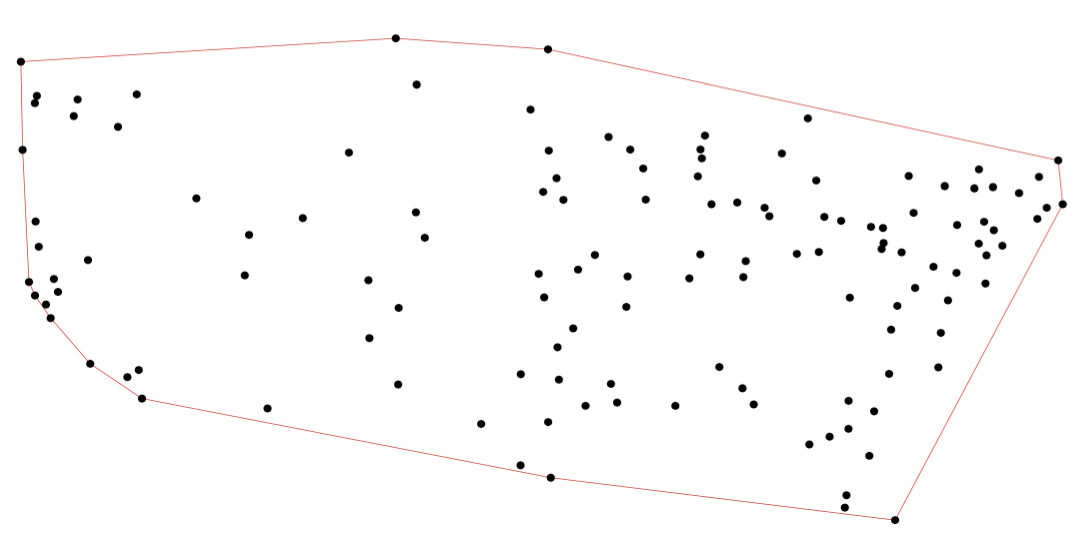

In [6]:
# Imagem do fecho convexo para as 128 cidades da América do Norte
img = Image.open(images_folder + "america_hull.png")
img

In [7]:
#Teste com as 5565 cidades do Brasil
filename = data_folder + "brasil.txt"
points = Point2D.read_from_file(filename)
graham_hull = Graham([p for p in points])
graham2_hull = Graham_up_down([p for p in points])
jarvis_hull = Jarvis([p for p in points])
size_hull_brasil = len(graham_hull)
if len(graham2_hull) != size_hull_brasil or len(jarvis_hull) != size_hull_brasil:
    print("Erro em algum dos algoritmos", len(graham2_hull), len(graham2_hull), len(jarvis_hull))
else:
    print("O numero de vértices no feixo convexo das cidades do Brasil é: ", len(graham_hull))

O numero de vértices no feixo convexo das cidades do Brasil é:  12


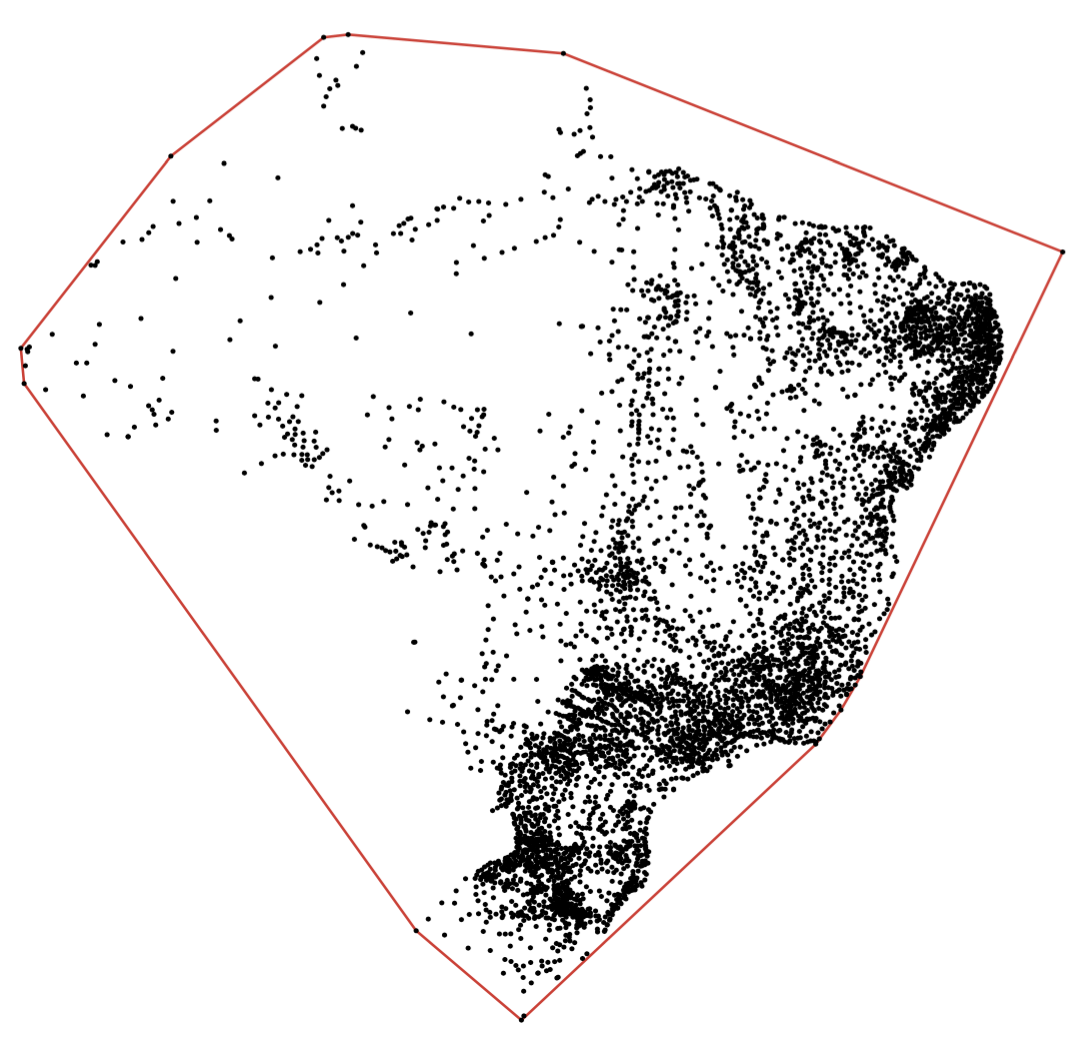

In [8]:
# Imagem do fecho convexo para as 5565 cidades do Brasil
img = Image.open(images_folder + "brasil_hull.png")
img

**3. Compare o desempenho dos algoritmos implementados em conjuntos de pontos gerados aleatoriamente dentro de um retângulo, dentro de um triângulo, dentro de um círculo, e sobre o círculo. Use conjuntos de 100 até 100000 pontos. (E mais se for possível.) Compare os tempos de cada algoritmo e também o esforço necessário para sua implementação.**

Para cada um dos testes neste item, implementou-se rotinas de geração de listas com pontos amostrados aleatoriamente dentro de regiões com a geometria solicitada. Para garantir uma distribuição de probabilidade uniforme, utilizou-se as ideias apresentadas em [2] e [3]. Os gráficos a seguir ilustram o comportamento do tempo de execução de cada um dos algoritmos em relação à quantidade de pontos amostrados.

In [2]:
#Preparação para a execução
algorithms = [Graham, Graham_up_down, Jarvis]
xsamples = [i*100 for i in range(1,10)]
xsamples += [i*1000 for i in range(1,10)]
xsamples += [i*10000 for i in range(1,11)]

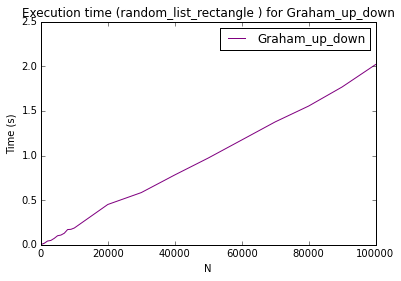

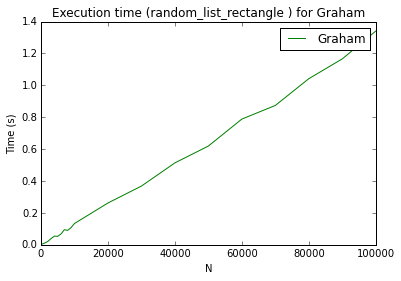

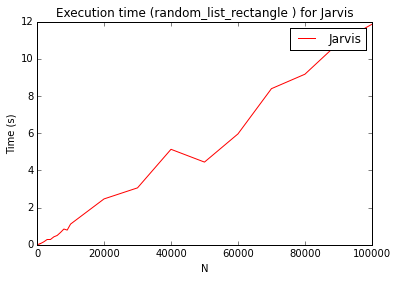

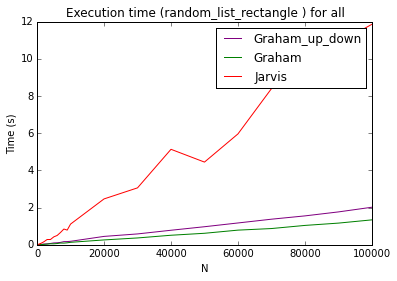

In [10]:
# Testes com pontos gerados aleatoriamente no interior de um retângulo
compare_algorithms_with_generated_data(algorithms, random_list_rectangle, xsamples)

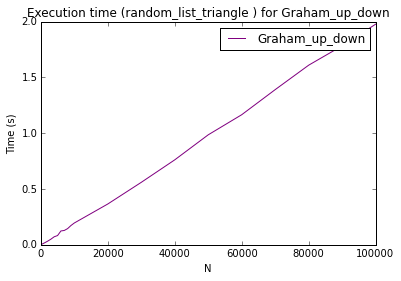

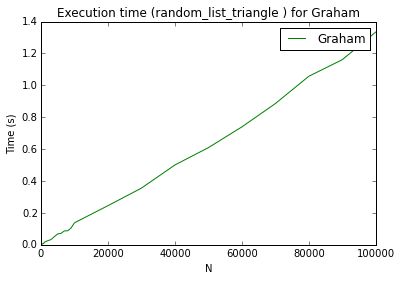

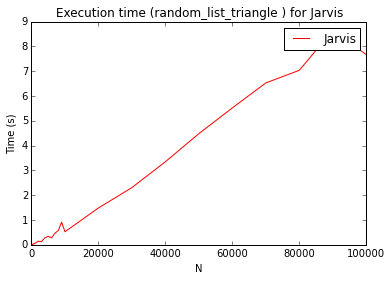

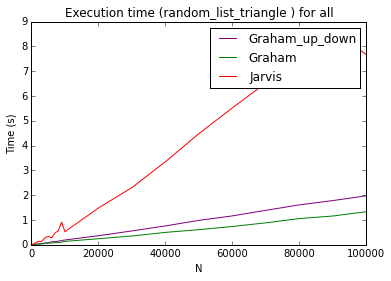

In [11]:
# Testes com pontos gerados aleatoriamente no interior de um triângulo
compare_algorithms_with_generated_data(algorithms, random_list_triangle, xsamples)

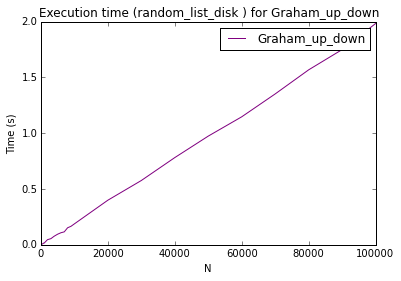

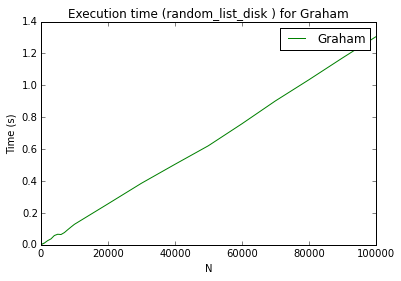

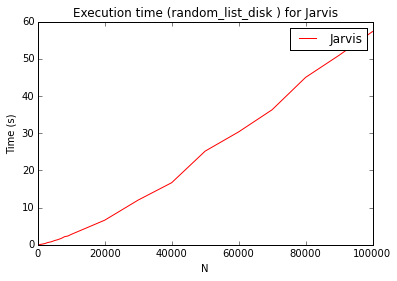

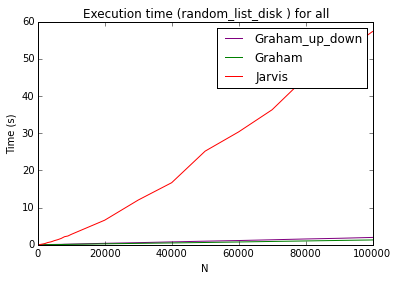

In [12]:
# Testes com pontos gerados aleatoriamente no interior de um círculo
compare_algorithms_with_generated_data(algorithms, random_list_disk, xsamples)

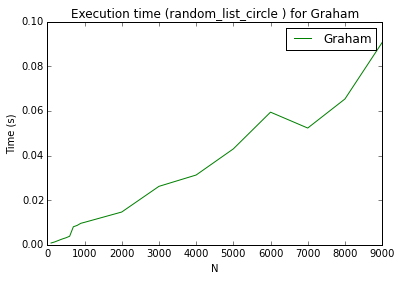

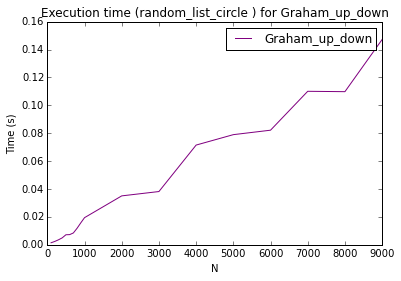

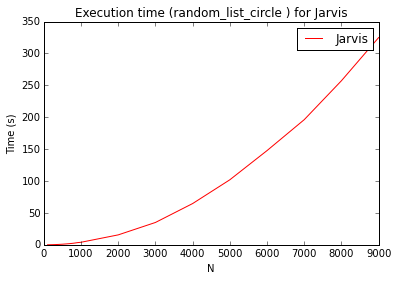

In [3]:
# Testes com pontos gerados aleatoriamente sobre um círculo. Como demoraria muito executar esta
#parte novamente neste ambiente, os resultados estão sendo lidos de um arquivo da primeira execução
#compare_algorithms_with_generated_data(algorithms, random_list_circle, xsamples)
plot_random_list_circle_results(False)

Ao analisarmos os gráficos, podemos observar algumas relações interessantes:

i) O tempo de execução para as duas variantes do algoritmo de Graham manteve praticamente o mesmo em todos os casos; isto é, independente de amostrarmos em um retângulo, triângulo, disco ou circunferência, o tempo de execução mostrou-se apenas dependente da quantidade de pontos do conjunto de entrada.

ii) O algoritmo de Jarvis, por sua vez, apresentou um desempenho dependente da região de amostragem dos pontos. No caso do triângulo, o tempo necessário não foi superior a 9s; para o retângulo, Jarvis apresentou tempo máximo de cerca de 12s, enquanto para o disco e o círculo observou-se quase 60s e mais de 300s (com menos de 10000 amostras!!!), respectivamente.
Esse resultado está de acordo com o esperado teoricamente, pois Jarvis é um algoritmo de complexidade O(nh), em que h é o número de pontos no fecho convexo do conjunto. Assim, quanto maior o número de pontos pertencentes ao fecho convexo, maior é a quantidade de operações executadas pelo algoritmo de Jarvis.

iii) Ainda seguindo a observação *"ii"*, verifica-se que nos casos circulares o algoritmo de Jarvis demora um tempo muitíssimo superior aos demais, dificultando a visualização do 3 algoritmos juntos sob a mesma escala. Pela dependência do tamanho da saída, o círculo configura-se como o opior caso para este algoritmo, pois todos os elementos do conjunto pertencem ao fecho convexo.


Quanto ao esforço de implementação, o algoritmo de Graham com ordenação angular foi o algoritmo com menor esforço de implementação, sendo implementado corretamente sem muitos problemas. 

A variante do algoritmo de Graham em que realiza-se uma ordenação dos pontos por seus valores da coordenada x e determinam-se os fechos inferior e superior apresenta um grau de esforço um pouco maior, porém ainda bem similar, visto que a base do algoritmo é a mesma, mudando-se apenas alguns detalhes quanto à dupla passagem pelos pontos.

O algoritmo de Jarvis, por sua vez, foi o que apresentou maior esforço de implementação, embora também seja um algoritmo bastante simples, uma vez que as rotinas de cálculo do teste CCW estão funcionando adequadamente.

**4. Refaça os testes do item anterior incorporando eliminação de pontos interiores. Vale a pena eliminar pontos interiores? Qual as frações do tempo total que levam a eliminação de pontos interiores e o cálculo do fecho convexo após essa eliminação?**

Para a eliminação de pontos interiores, adotou-se a seguinte estratégia:

i) Primeiramente, determina-se dentre o conjunto de pontos de entrada 4 pontos particulares: o ponto de menor ordenada
x (left), o ponto de menor abcissa y (bottom), o ponto de maior ordenada x (right) e o ponto de maior abcissa y (top).

ii) Após isso, para cada ponto de entrada, realizam-se 4 testes CCW em relação às arestas do quadrilátero formado pelos
pontos (left, bottom, right, top).

iii) Caso o ponto esteja à direita de algum destes seguimentos, ele é adicionado a uma nova lista (inicialmente vazia),
que contempla apenas os pontos que não estão no interior deste quadrilátero. (Retornar esta nova lista é equivalente
a remover os demais pontos da lista de entrada).

O caso degenerado em que algum dos 4 pontos coincide com um dos outros 3 é tratado naturalmente (apenas elimina-se
os pontos no interior do triângulo). No caso em que o quadrilátero degenera-se em um segmento de reta, nenhum ponto é
eliminado. (Considerando que os pontos foram gerados aleatoriamente e com distribuição uniforme, este caso é praticamente impossível).

In [5]:
# Testes com pontos gerados aleatoriamente no interior de um retangulo com eliminação de pontos interiores
compare_algorithms_with_generated_data(algorithms, random_list_rectangle, xsamples, True)

In [6]:
# Testes com pontos gerados aleatoriamente no interior de um triângulo com eliminação de pontos interiores
compare_algorithms_with_generated_data(algorithms, random_list_triangle, xsamples, True)

In [7]:
# Testes com pontos gerados aleatoriamente no interior de um círculo com eliminação de pontos interiores
compare_algorithms_with_generated_data(algorithms, random_list_disk, xsamples, True)

In [5]:
# Testes com pontos gerados aleatoriamente sobre um círculo com eliminação de pontos interiores
compare_algorithms_with_generated_data(algorithms, random_list_circle, xsamples, True)

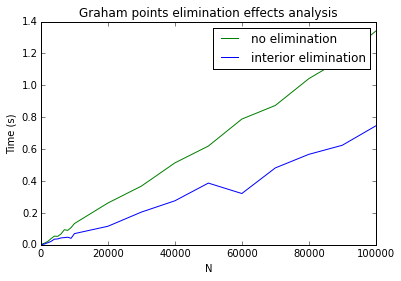

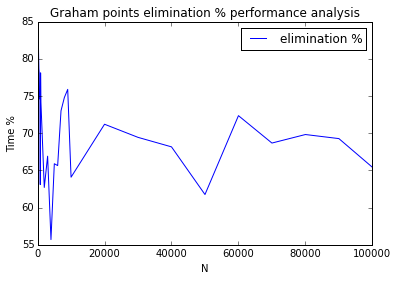

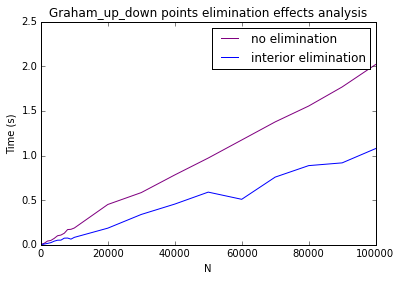

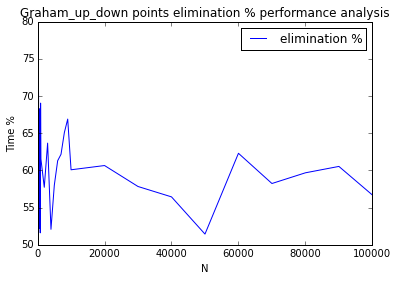

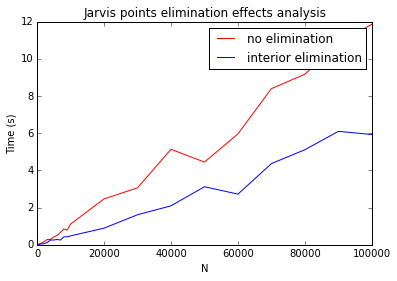

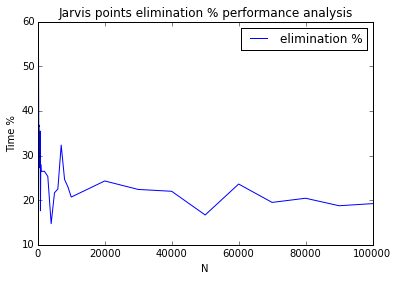

In [8]:
#Efeito da eliminação de pontos interiores no caso de amostragem em retângulo
compare_interior_elimination_effect(Graham, random_list_rectangle)
compare_interior_elimination_effect(Graham_up_down, random_list_rectangle)
compare_interior_elimination_effect(Jarvis, random_list_rectangle)

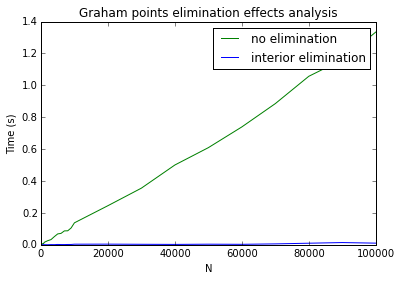

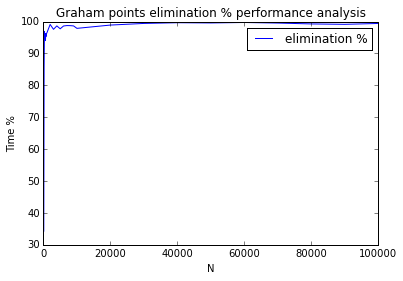

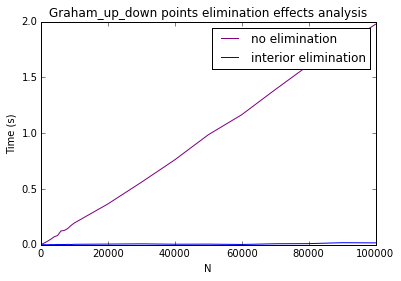

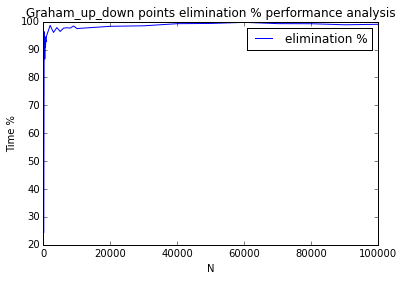

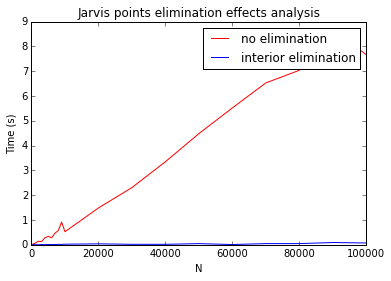

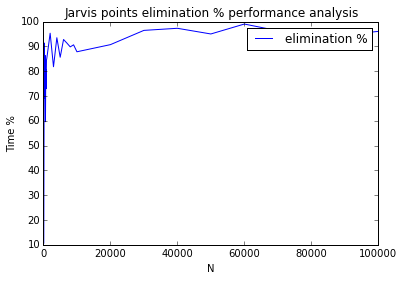

In [9]:
#Efeito da eliminação de pontos interiores no caso de amostragem em triângulo
compare_interior_elimination_effect(Graham, random_list_triangle)
compare_interior_elimination_effect(Graham_up_down, random_list_triangle)
compare_interior_elimination_effect(Jarvis, random_list_triangle)

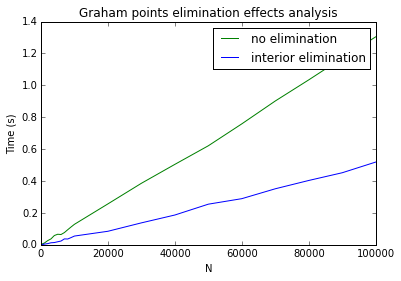

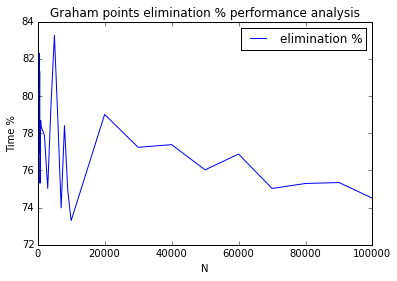

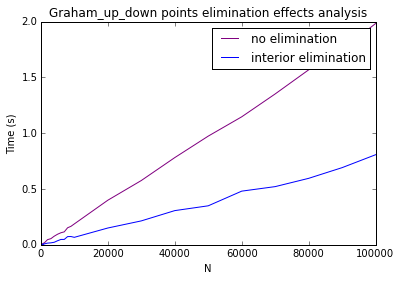

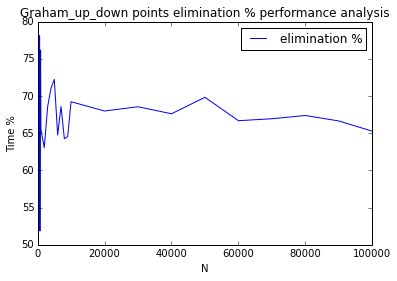

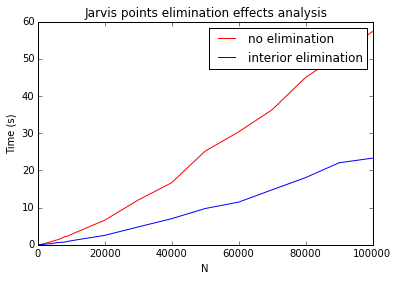

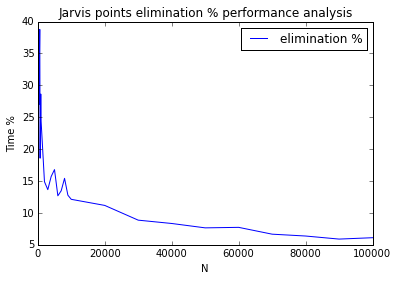

In [6]:
#Efeito da eliminação de pontos interiores no caso de amostragem no interior do círculo
compare_interior_elimination_effect(Graham, random_list_disk)
compare_interior_elimination_effect(Graham_up_down, random_list_disk)
compare_interior_elimination_effect(Jarvis, random_list_disk)

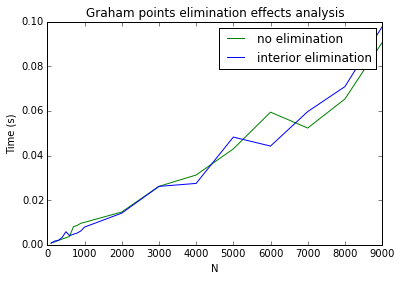

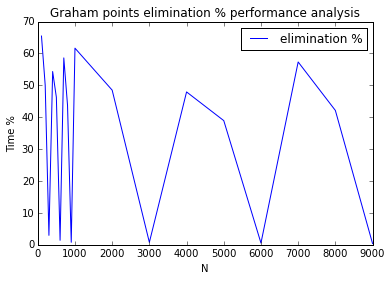

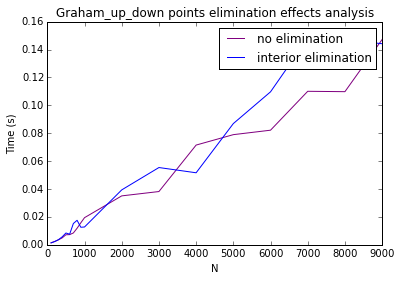

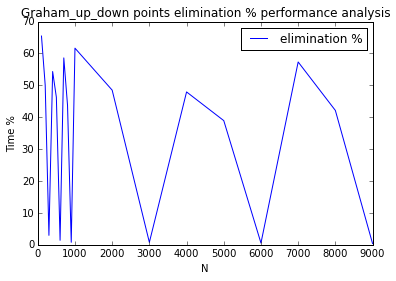

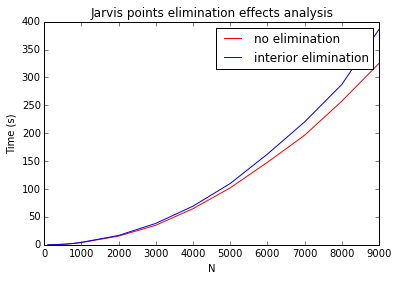

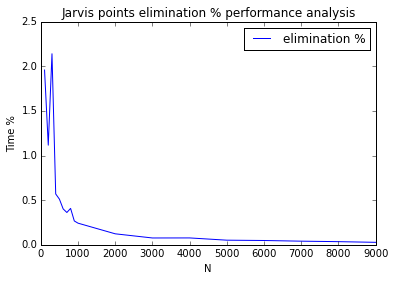

In [8]:
#Efeito da eliminação de pontos interiores no caso de amostragem sobre o círculo
compare_interior_elimination_effect(Graham, random_list_circle)
compare_interior_elimination_effect(Graham_up_down, random_list_circle)
compare_interior_elimination_effect(Jarvis, random_list_circle)

Percebe-se que no caso de pontos gerados aleatoriamente como nestes experimentos, a eliminação de pontos interiores como um pré-processamento dos algoritmos reduziu o tempo necessário para a execução de cada um deles, exceto no caso do círculo.

Verifica-se que quanto mais rápida a execução após a eliminação de pontos interiores, maior o percentual do tempo de eliminação em relação ao tempo total de execução. No caso de amostragem no triângulo, por exemplo, a eliminação de pontos interiores foi tão efetiva que mais de 90% do tempo total de execução dos algoritmos foi dessa etapa, e o tempo de execução do algoritmo após isso foi bastante inferior ao tempo encontrado sem eliminação desses pontos.

No caso dos pontos amostrados sobre o círculo, não houve ganho de desempenho pois todos os pontos do círculo pertencem ao fecho convexo do conjunto e, portanto, não há pontos interiores a serem eliminados. Por conta disso, o percentual de tempo ocupado por essa etapa é pequeno em relação ao tempo total do algoritmo.

**5. Avalie o papel do passo de ordenação no desempenho global dos seus programas. Qual a diferença entre usar um algoritmo quadrático ou um algoritmo O(n log n)?**

   O passo de ordenação tem papel fundamental no desempenho global dos algoritmos de fecho convexo com ordenação explícita, pois caso os pontos fossem dados já de forma ordenada, poderíamos encontrar o fecho convexo em tempo linear com o algoritmo de Graham, por exemplo.

   A complexidade do algoritmo de ordenação utilizado é que domina assintoticamente a complexidade dos algoritmos ótimos de determinação de fecho convexo implementados. Assim, se utilizarmos um algorimo quadrático como passo do algoritmo de Graham, por exemplo, teremos uma solução com desempenho O(n<sup>2</sup>) e não mais O(nlog(n)).

### Referências
[1] hallpaz Github: https://github.com/hallpaz/Algorithms-Course-IMPA-2015/tree/master/assignments/convex_hull

[2] Sample random point in triangle: http://stackoverflow.com/questions/4778147/sample-random-point-in-triangle

[3] Generate a random point within a circle (uniformly): http://stackoverflow.com/questions/5837572/generate-a-random-point-within-a-circle-uniformly/5838055#5838055

